In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
data = pd.read_csv("cardio_csv.txt")

In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [4]:
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69300,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [5]:
data.shape

(69301, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
data_dup = data.duplicated().any()
print(data_dup)

False


In [9]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003587,0.003773,-0.003735,-0.001549,0.003268,-0.002757,0.006400,0.002543,-0.003294,0.000384,0.002700,0.004269
age,0.003587,1.000000,-0.023150,-0.081304,0.054409,0.020663,0.017717,0.154343,0.099095,-0.047680,-0.029435,-0.009926,0.238095
gender,0.003773,-0.023150,1.000000,0.499373,0.155649,0.005980,0.015396,-0.036335,-0.021154,0.337608,0.171015,0.006241,0.008592
height,-0.003735,-0.081304,0.499373,1.000000,0.290333,0.005492,0.006215,-0.050632,-0.018929,0.187899,0.094164,-0.005974,-0.011015
weight,-0.001549,0.054409,0.155649,0.290333,1.000000,0.030665,0.043652,0.141901,0.107255,0.068304,0.067259,-0.016514,0.182094
ap_hi,0.003268,0.020663,0.005980,0.005492,0.030665,1.000000,0.015919,0.023573,0.011821,-0.000933,0.001385,0.000032,0.054211
ap_lo,-0.002757,0.017717,0.015396,0.006215,0.043652,0.015919,1.000000,0.024023,0.010895,0.004948,0.010764,0.004962,0.065290
cholesterol,0.006400,0.154343,-0.036335,-0.050632,0.141901,0.023573,0.024023,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752
gluc,0.002543,0.099095,-0.021154,-0.018929,0.107255,0.011821,0.010895,0.451741,1.000000,-0.004608,0.011442,-0.007301,0.089062
smoke,-0.003294,-0.047680,0.337608,0.187899,0.068304,-0.000933,0.004948,0.010237,-0.004608,1.000000,0.339709,0.025794,-0.015225


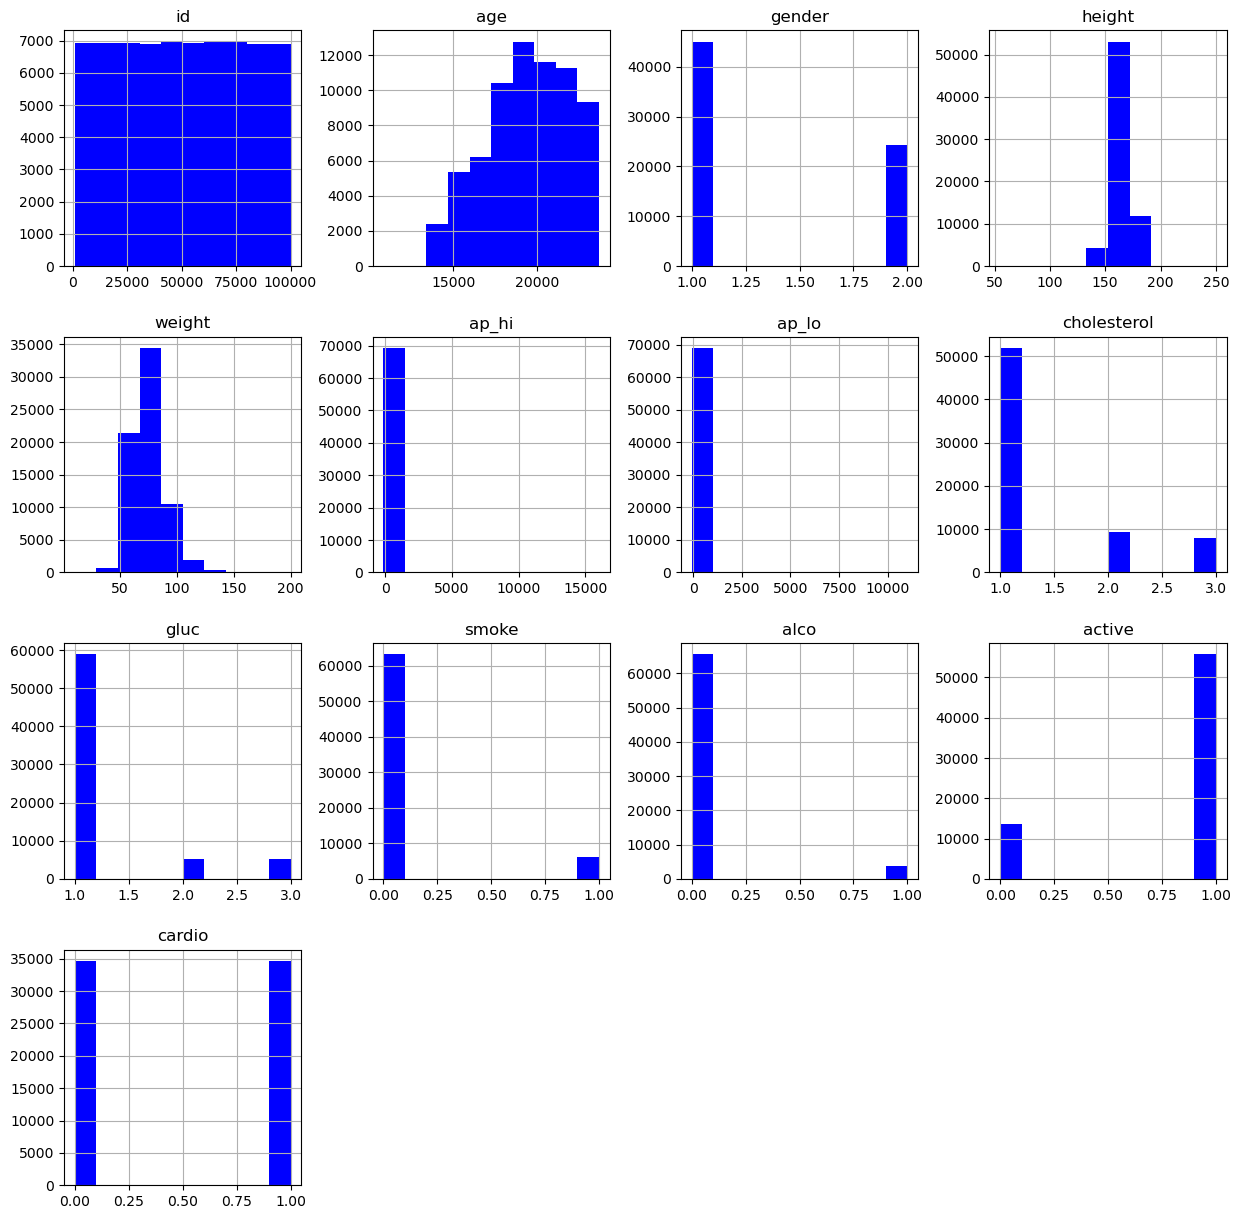

In [11]:
data.hist(figsize = (15,15),color = 'blue')
plt.show()

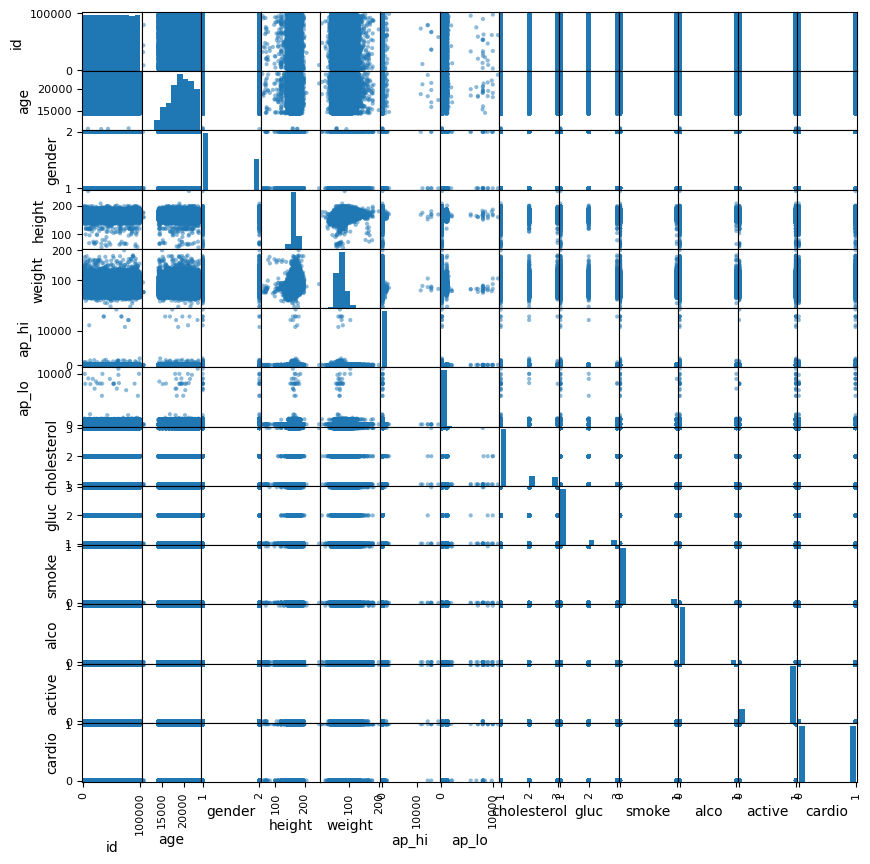

In [12]:
scatter_matrix(data,figsize = (10,10))
plt.show()

<AxesSubplot:>

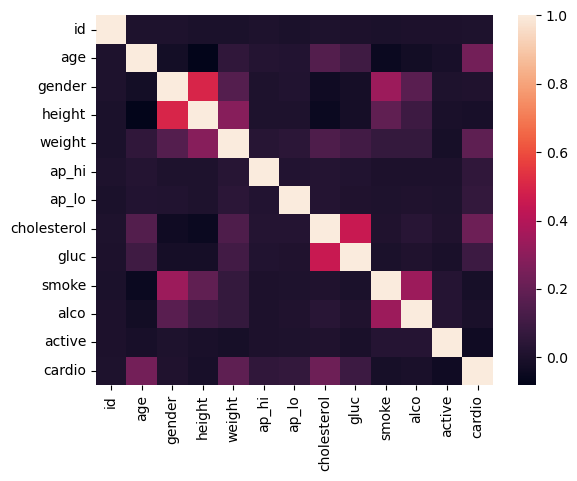

In [13]:
sns.heatmap(data.corr())

<AxesSubplot:>

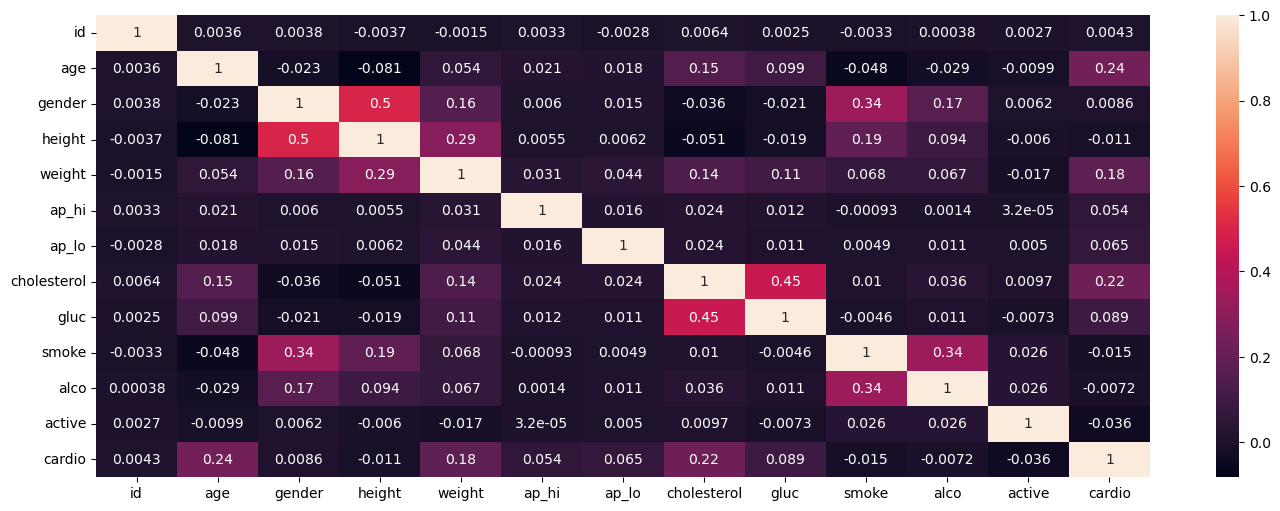

In [14]:
plt.figure(figsize=(17,6))
sns.heatmap(data.corr(),annot = True)

In [15]:
data["cardio"].value_counts()

0    34679
1    34622
Name: cardio, dtype: int64

<AxesSubplot:xlabel='cardio', ylabel='count'>

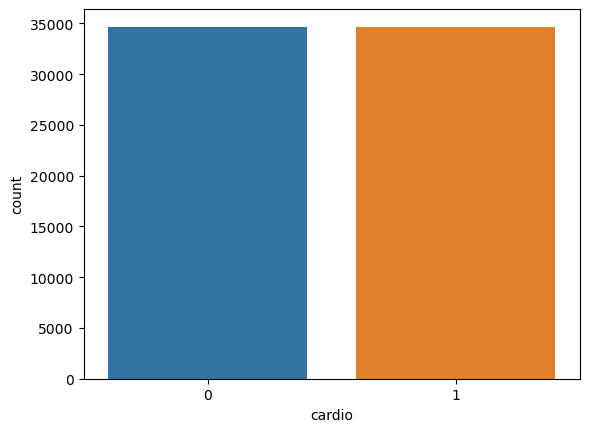

In [16]:
sns.countplot(x='cardio',data = data)

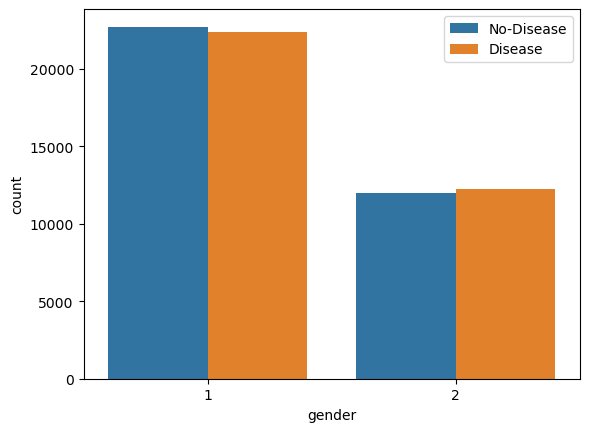

In [17]:
sns.countplot(x="gender",hue="cardio",data = data)
plt.legend(labels = ['No-Disease','Disease'])
plt.show()

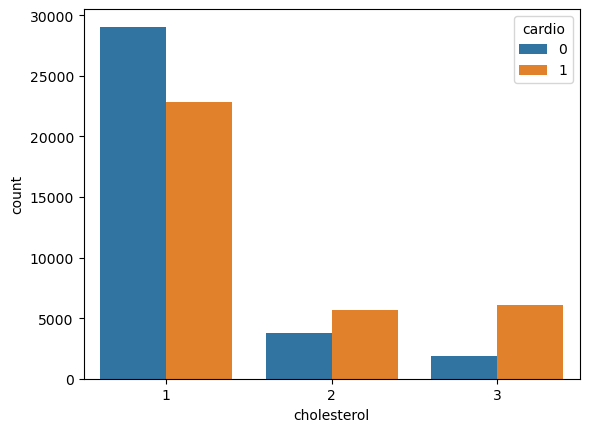

In [18]:
sns.countplot(x="cholesterol",hue="cardio",data = data)
plt.show()

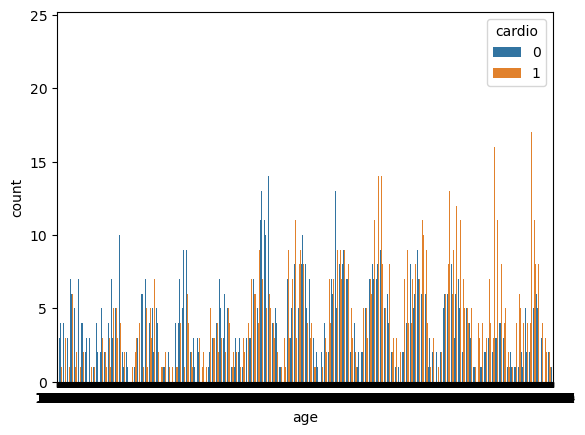

In [19]:
sns.countplot(data = data,x ='age', hue='cardio')
plt.show()

In [20]:
data['new_age'] = (data['age']/365).round(0)

In [21]:
data['new_age']

0        62.0
1        40.0
2        60.0
3        40.0
4        64.0
         ... 
69296    53.0
69297    62.0
69298    52.0
69299    61.0
69300    56.0
Name: new_age, Length: 69301, dtype: float64

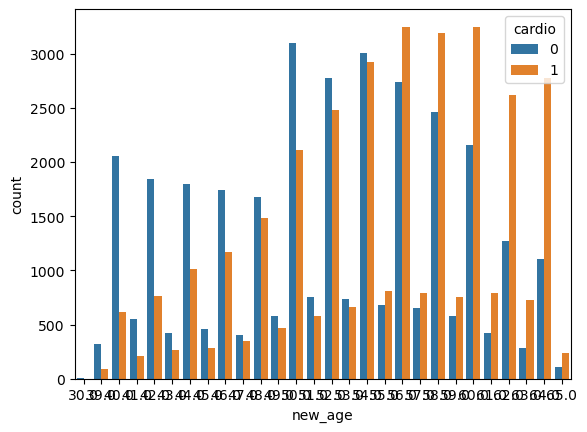

In [22]:
sns.countplot(data = data, x = data['new_age'],hue = 'cardio')
plt.show()

In [23]:
data.drop(['new_age'],axis = 'columns')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [24]:
x = data.drop(['cardio','id'],axis = 'columns')

In [25]:
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,new_age
0,22469,1,155,69.0,130,80,2,2,0,0,1,62.0
1,14648,1,163,71.0,110,70,1,1,0,0,1,40.0
2,21901,1,165,70.0,120,80,1,1,0,0,1,60.0
3,14549,2,165,85.0,120,80,1,1,1,1,1,40.0
4,23393,1,155,62.0,120,80,1,1,0,0,1,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,19240,2,168,76.0,120,80,1,1,1,0,1,53.0
69297,22601,1,158,126.0,140,90,2,2,0,0,1,62.0
69298,19066,2,183,105.0,180,90,3,1,0,1,0,52.0
69299,22431,1,163,72.0,135,80,1,2,0,0,0,61.0


In [26]:
y = data['cardio']

In [27]:
y

0        0
1        1
2        0
3        0
4        0
        ..
69296    0
69297    1
69298    1
69299    1
69300    0
Name: cardio, Length: 69301, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.4,random_state = 1)

In [30]:
xtrain

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,new_age
20581,19831,2,177,79.0,140,90,1,1,0,0,0,54.0
54468,19014,1,159,72.0,110,90,1,1,0,0,1,52.0
68799,16961,1,156,59.0,130,80,1,1,0,0,1,46.0
17195,22086,2,185,90.0,140,90,3,1,0,1,1,61.0
13169,15232,1,164,68.0,100,70,1,1,0,0,1,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49100,19655,2,160,70.0,150,100,1,1,1,0,1,54.0
20609,21840,2,166,85.0,130,80,1,1,0,0,0,60.0
21440,18237,1,154,59.0,130,80,1,2,0,0,1,50.0
50057,19520,2,162,70.0,160,100,1,3,0,0,1,53.0


In [31]:
ytrain

20581    1
54468    0
68799    0
17195    1
13169    0
        ..
49100    1
20609    1
21440    0
50057    1
5192     1
Name: cardio, Length: 41580, dtype: int64

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc = RandomForestClassifier(n_estimators = 100)

In [34]:
rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [35]:
pred = rfc.predict(xtest)

In [36]:
rfc.score(xtest, ytest)

0.7148371270877674

In [37]:
cr = classification_report(ytest, pred)

In [38]:
print(cr)

              precision    recall  f1-score   support

           0       0.71      0.73      0.72     13890
           1       0.72      0.70      0.71     13831

    accuracy                           0.71     27721
   macro avg       0.72      0.71      0.71     27721
weighted avg       0.72      0.71      0.71     27721



In [39]:
cm = confusion_matrix(ytest, pred)

In [40]:
print (cm)

[[10176  3714]
 [ 4191  9640]]


Text(50.722222222222214, 0.5, 'Actual Label')

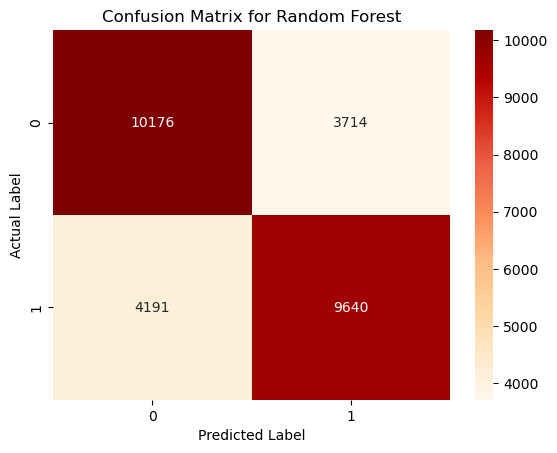

In [41]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'OrRd', fmt = 'g')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')


In [42]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xtrain, ytrain)
pred = dtc.predict(xtest)
dtc.score(xtest, ytest)
cr = classification_report(ytest, pred)

In [43]:
dtc = DecisionTreeClassifier()

In [44]:
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [45]:
pred = dtc.predict(xtest)

In [46]:
dtc.score(xtest, ytest)

0.6327693806139749

In [47]:
cr = classification_report(ytest, pred)

In [48]:
print(cr)

              precision    recall  f1-score   support

           0       0.63      0.63      0.63     13890
           1       0.63      0.63      0.63     13831

    accuracy                           0.63     27721
   macro avg       0.63      0.63      0.63     27721
weighted avg       0.63      0.63      0.63     27721



In [49]:
cm = confusion_matrix(ytest, pred)
print (cm)

[[8760 5130]
 [5050 8781]]


Text(50.722222222222214, 0.5, 'Actual Label')

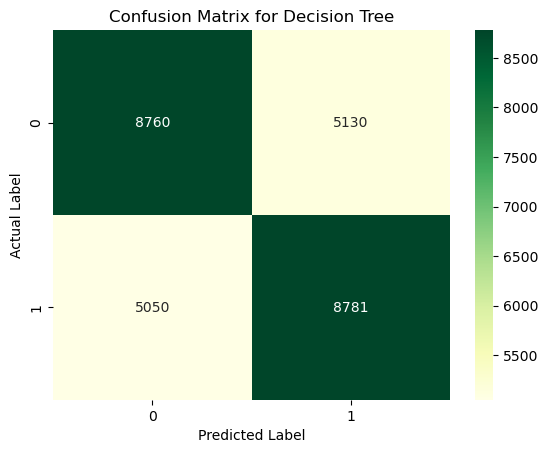

In [50]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'YlGn', fmt = 'g')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [51]:
from sklearn.svm import SVC

In [52]:
svm = SVC()

In [53]:
svm.fit(xtrain, ytrain)

SVC()

In [54]:
svm.score(xtest, ytest)

0.6060748169257963

In [55]:
pred = svm.predict(xtest)

In [56]:
cr = classification_report(ytest, pred)

In [57]:

print(cr)

              precision    recall  f1-score   support

           0       0.60      0.65      0.62     13890
           1       0.62      0.56      0.59     13831

    accuracy                           0.61     27721
   macro avg       0.61      0.61      0.61     27721
weighted avg       0.61      0.61      0.61     27721



In [58]:
cm = confusion_matrix(ytest, pred)

In [59]:
print (cm)

[[9043 4847]
 [6073 7758]]


Text(50.722222222222214, 0.5, 'Actual Label')

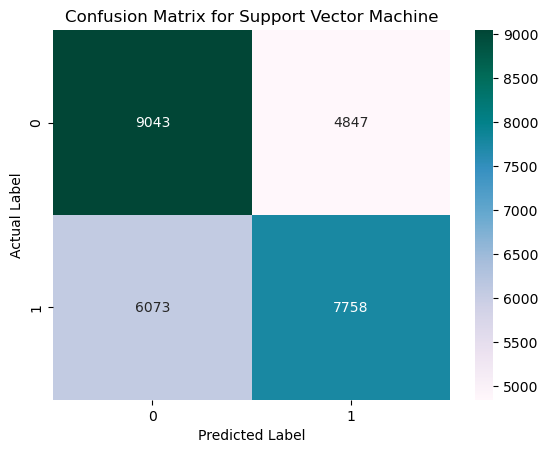

In [60]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'PuBuGn', fmt = 'g')
plt.title('Confusion Matrix for Support Vector Machine')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
lr = LogisticRegression()

In [63]:
lr.fit(xtrain, ytrain)

LogisticRegression()

In [64]:
lr.score(xtest, ytest)


0.6904873561559828

In [65]:

pred = lr.predict(xtest)

In [66]:
cr = classification_report(ytest, pred)


In [67]:
print(cr)

              precision    recall  f1-score   support

           0       0.68      0.72      0.70     13890
           1       0.70      0.66      0.68     13831

    accuracy                           0.69     27721
   macro avg       0.69      0.69      0.69     27721
weighted avg       0.69      0.69      0.69     27721



In [68]:
cm = confusion_matrix(ytest, pred)

In [69]:
print(cm)

[[10033  3857]
 [ 4723  9108]]


Text(50.722222222222214, 0.5, 'Actual Label')

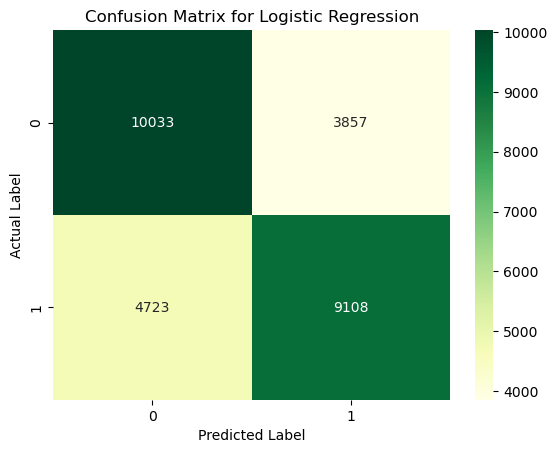

In [70]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'YlGn', fmt = 'g')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')


In [71]:
from sklearn.naive_bayes import GaussianNB

In [72]:
gnb = GaussianNB()

In [73]:
gnb.fit(xtrain, ytrain)

GaussianNB()

In [74]:
gnb.score(xtest, ytest)

0.6035135817611197

In [75]:
pred = gnb.predict(xtest)

In [76]:
cr = classification_report(ytest, pred)

In [77]:
print (cr)

              precision    recall  f1-score   support

           0       0.57      0.88      0.69     13890
           1       0.73      0.33      0.45     13831

    accuracy                           0.60     27721
   macro avg       0.65      0.60      0.57     27721
weighted avg       0.65      0.60      0.57     27721



In [78]:
cm = confusion_matrix(ytest, pred)
print (cm)


[[12156  1734]
 [ 9257  4574]]


Text(50.722222222222214, 0.5, 'Actual Label')

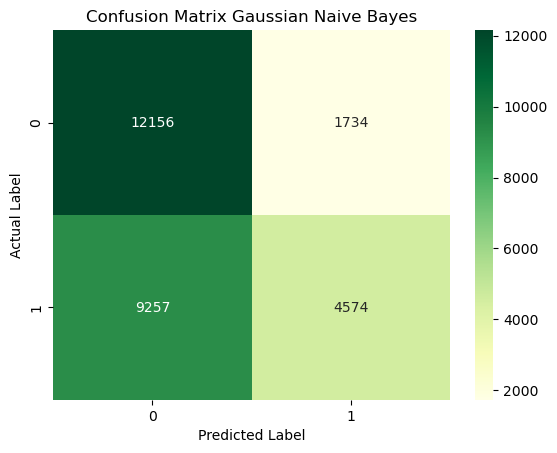

In [79]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'YlGn', fmt = 'g')
plt.title('Confusion Matrix Gaussian Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')


In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn = KNeighborsClassifier()

In [82]:
knn.fit(xtrain, ytrain)


KNeighborsClassifier()

In [83]:
knn.score(xtest, ytest)

C:\Users\paill\OneDrive\Desktop\dia\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.6852566646224884

In [84]:
pred = knn.predict(xtest)

C:\Users\paill\OneDrive\Desktop\dia\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [85]:
cr = classification_report(ytest, pred)

In [86]:
print(cr)

              precision    recall  f1-score   support

           0       0.68      0.71      0.69     13890
           1       0.69      0.66      0.68     13831

    accuracy                           0.69     27721
   macro avg       0.69      0.69      0.69     27721
weighted avg       0.69      0.69      0.69     27721



In [87]:
cm = confusion_matrix(ytest, pred)

In [88]:
print (cm)

[[9802 4088]
 [4637 9194]]


Text(50.722222222222214, 0.5, 'Actual Label')

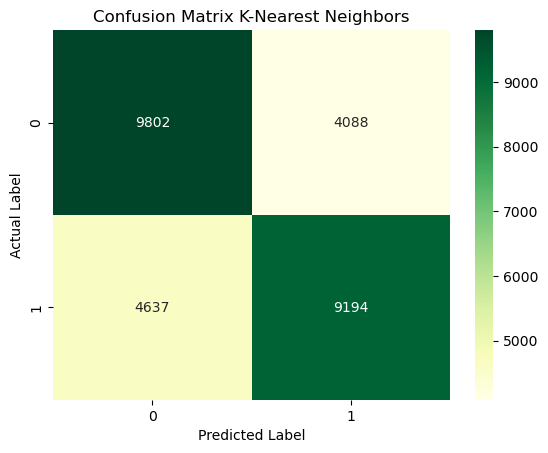

In [89]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'YlGn', fmt = 'g')
plt.title('Confusion Matrix K-Nearest Neighbors')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')


In [90]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [91]:
lda = LinearDiscriminantAnalysis()

In [92]:
lda.fit(xtrain, ytrain)

LinearDiscriminantAnalysis()

In [93]:
lda.score(xtest, ytest)

0.6496518884600123

In [94]:
pred = lda.predict(xtest)

In [95]:
cr = classification_report(ytest, pred)

In [96]:
print (cr)

              precision    recall  f1-score   support

           0       0.64      0.69      0.66     13890
           1       0.66      0.61      0.64     13831

    accuracy                           0.65     27721
   macro avg       0.65      0.65      0.65     27721
weighted avg       0.65      0.65      0.65     27721



In [97]:
cm = confusion_matrix(ytest, pred)

In [98]:
print (cm)

[[9515 4375]
 [5337 8494]]


Text(50.722222222222214, 0.5, 'Actual Label')

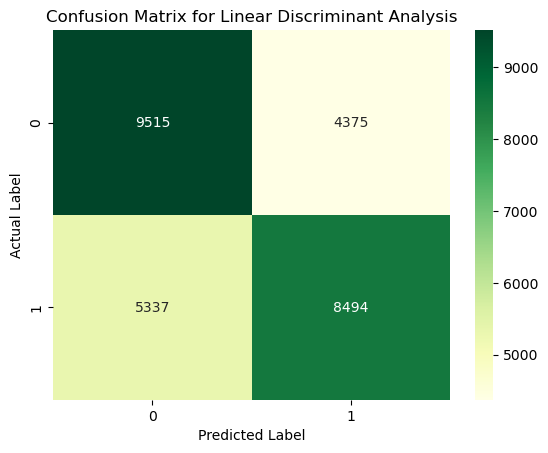

In [99]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'YlGn', fmt = 'g')
plt.title('Confusion Matrix for Linear Discriminant Analysis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')


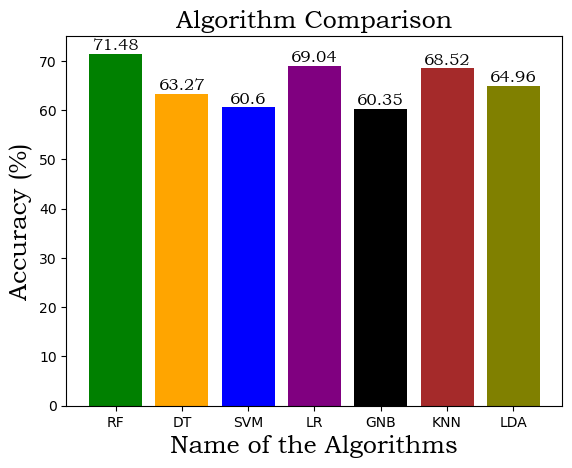

In [102]:
x = np.array(["RF", "DT", "SVM", "LR", "GNB", "KNN", "LDA"])
y = np.array([71.48, 63.27, 60.60, 69.04, 60.35,68.52, 64.96])
colors_list = ['Green','Orange', 'Blue', 'Purple', 'Black', 'Brown', 'Olive']
plt.xlabel('Name of the Algorithms', fontname="Bookman Old Style", fontsize=18)
plt.title('Algorithm Comparison', fontname="Bookman Old Style", fontsize=18)
plt.ylabel('Accuracy (%)', fontname="Bookman Old Style", fontsize=18)
pb = plt.bar(x, y, color = colors_list)
for i in range(len(x)):
 plt.text(i, y[i], y[i], ha = "center", va = "bottom", fontname="Bookman Old Style", fontsize = 12)
plt.show()

In [1]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [2]:
df = pd.read_csv("cardio_csv.txt")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [3]:
X = df.drop(['cardio',"id"],axis = 'columns')
y = df['cardio']

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [5]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [7]:
pd.to_pickle(model,r'new_model.pickle')

In [8]:
model = pd.read_pickle(r'new_model.pickle')

In [9]:
Patient_Age = int(input("Enter Patient_Age: "))
Patient_Gender = int(input("Enter Patient_Gender: "))
Patient_HEIGHT = int(input("Enter Patient_HEIGHT: "))
Patient_WEIGHT = int(input("Enter Patient_WEIGHT: "))
PATIENT_AP_HI = int(input( "Enter ap_hi:"))
PATIENT_AP_LO = int(input("Enter ap_l0:"))
PATIENT_CHOLESTROL = int(input("Enter Cholestral:"))
PATIENT_GLUCOSE = int(input("Enter Glucose LEVEL:"))
PATIENT_SMOKE = int(input("SMOKE:"))
PATIENT_ALCO = int(input("ALCO:"))
PATIENT_ACTIVE =int(input("Active:"))

Enter Patient_Age: 22222
Enter Patient_Gender: 2
Enter Patient_HEIGHT: 165
Enter Patient_WEIGHT: 85
Enter ap_hi:120
Enter ap_l0:80
Enter Cholestral:1
Enter Glucose LEVEL:1
SMOKE:1
ALCO:1
Active:1


In [10]:
result = model.predict([[Patient_Age,Patient_Gender,Patient_HEIGHT,Patient_WEIGHT,PATIENT_AP_HI,PATIENT_AP_LO,PATIENT_CHOLESTROL,PATIENT_GLUCOSE,PATIENT_SMOKE,PATIENT_ALCO,PATIENT_ACTIVE]])

C:\Users\paill\OneDrive\Desktop\dia\New folder\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [11]:
if (result == 0):
    print("Absence of cardiovascular disease")
else:
    print("Presence of cardiovascular disease")
print(result)

Absence of cardiovascular disease
[0]
